<a href="https://colab.research.google.com/github/yoonyoung27/prac_class/blob/main/deeplearning_prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✓ Preparation settings : 런타임 유형 : GPU

✓ GPU 확인 : Persistance-M

In [ ]:
!nvidia-smi

Wed Apr 14 08:10:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

✓ Import [Tensorflow](https://www.tensorflow.org/?hl=ko)

In [ ]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

# Classify hand-written digits

This notebook contains the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff).

**The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9).** It's a first concrete example of a neural network which makes use of the Python library Keras, MNIST dataset.

✓ Ready for dataset

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

* mnist.load_data() 함수는 '(x_train, y_train), (x_test, y_test)'값을 반환하므로 (train_images, train_labels), (test_images, test_labels) 변수로 반환값을 받는다.
* `train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

✓ information of dataset

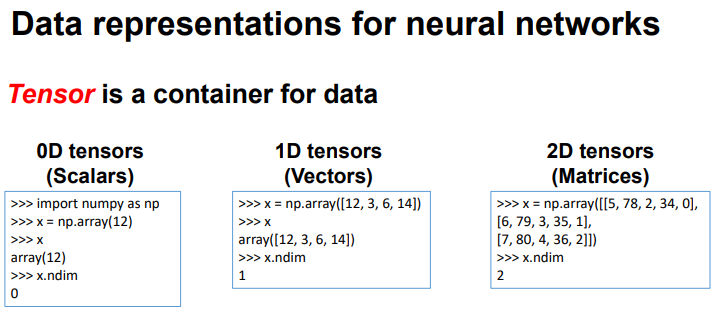

* Rank : number of axes can be checked by .ndim for numpy object
* Shape : dimensions the tensor has along each axes can be checked by .shape for numpy object
* Data type : type and bit you use can be checked by .dtype for numpy object

In [ ]:
print(train_images.ndim,
      train_images.shape,
      train_images.dtype,)

print(len(train_images))

import numpy as np
np.max(train_images)

3 (60000, 28, 28) uint8
60000


255

* The train set is a 3 dimensional tensor data
* The train set has 60000 observations, 28 pixels by 28 pixels
* The train set uses 8 bite to represent the integer

In [ ]:
print(test_images.ndim,
      test_images.shape,
      test_images.dtype)

print(len(test_labels),
      test_labels)

3 (10000, 28, 28) uint8
10000 [7 2 1 ... 4 5 6]


* The test set is a 3 dimensional tensor data
* The test tet has 10000 observations, 28 pixels by 28 pixels
* The test set uses 8 bite to represent the integer

\* Visualization

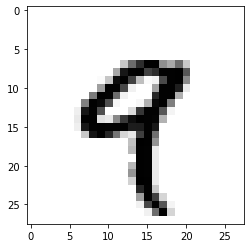

In [ ]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

\* Visualization with slicing

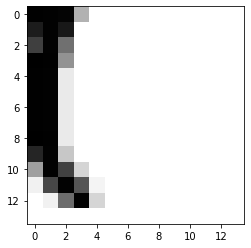

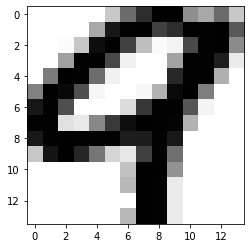

In [ ]:
my_slice_1 = train_images[4, 14:, 14:]
plt.imshow(my_slice_1, cmap=plt.cm.binary) 
plt.show()

my_slice_2 = train_images[4, 7:-7, 7:-7]
plt.imshow(my_slice_2, cmap=plt.cm.binary) 
plt.show()

✓ Defining model

First, we will present our neural network with the training data, 'train_images' and 'train_labels'.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))  #layer1
network.add(layers.Dense(10, activation='softmax'))                        #layer2

* keras의 Dense 클래스를 사용해 신경망의 출력층을 만든 Dense layers
* The second layer automatically inferred its input shape as being the output shape of the layer that came before
* Layers extract representations and define the model image.png = f(x;weights)

✓ Comfile  
keras 모델에서 손실 함수와 측정 지표 등을 지정하는 메서드 

Second, prepare for network training

In [ ]:
network.compile(optimizer='rmsprop',              # an optimizer of mini batch gradient descent method
                loss='categorical_crossentropy',  # a loss function for a many-class classification problem
                metrics=['accuracy'])

* Loss function [Loss(image.png, y)] : Measure how good a job it is doing on its training data, and how it will be able to steer itself in the right direction
* Optimizer : Minimize the loss funcion with respect to weights
* Metrics : Monitor during training and testing

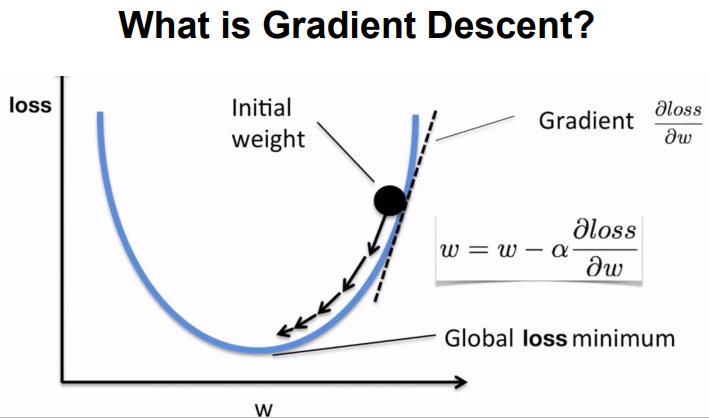

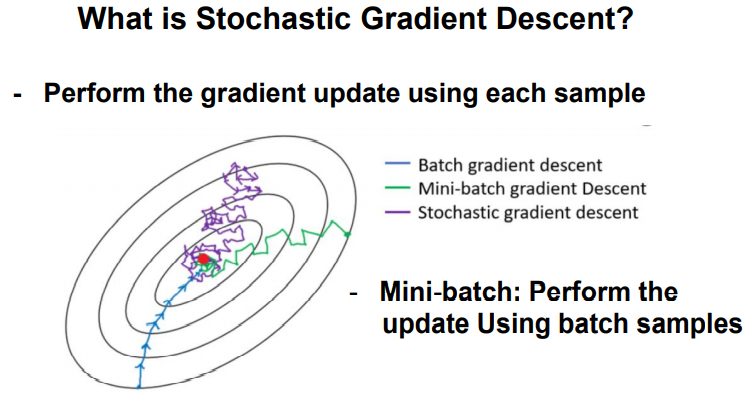

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

* Rescale values from [0, 255] to [0, 1]

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

* Categorically encode the labels  
?

✓ Fit

Third, the network will learn to associate images and labels.

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 4ms/step - loss: 0.4201 - accuracy: 0.8806
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1149 - accuracy: 0.9665
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0689 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0481 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0350 - accuracy: 0.9897


* epochs indicate that 5 times of training
* batch_size indicate that size of mini batch training because the deep learning model don't process an entire dataset at once
* The "loss" of the network over the training data, and the "accuracy" of the network over the training data is displayed during training

✓ Test

Finally, we will ask the network to produce predictions for 'test_images', and we will verify if these predictions match the labels from 'test_labels'.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0660 - accuracy: 0.9793


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.9793000221252441


* This gap between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data

You will learn about "tensors", the data-storing objects going into the network, about tensor operations, which layers are made of, and about gradient descent, which allows our network to learn from its training examples.